<a href="https://colab.research.google.com/github/JuliaPera17/desafio/blob/main/desafio%20de%20xadrez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

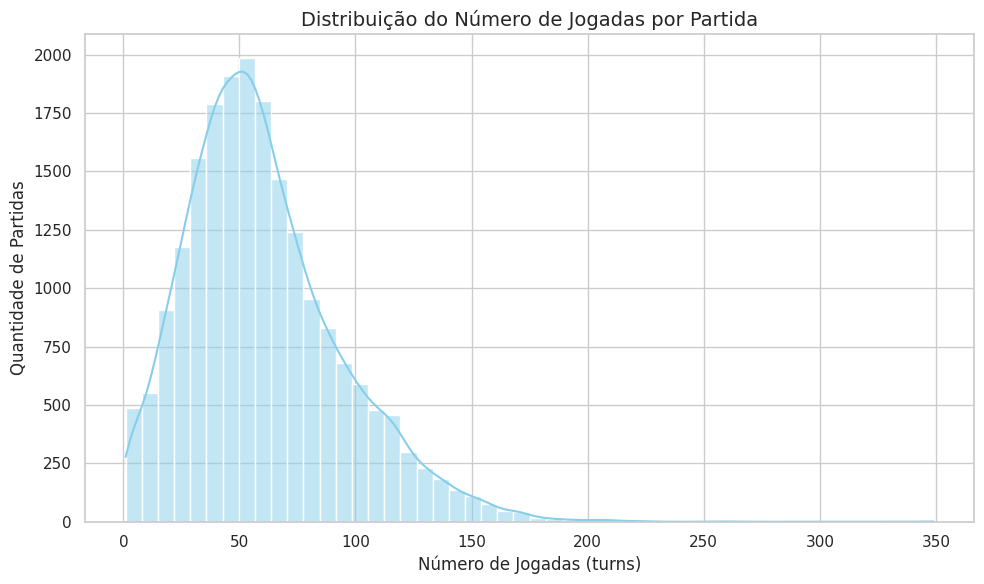

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar a base de dados (ajuste o caminho se necessário)
games_df = pd.read_csv("/content/games.csv")

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Criar o gráfico: histograma com KDE (Estimativa de Densidade)
plt.figure(figsize=(10, 6))
sns.histplot(games_df["turns"], kde=True, bins=50, color="skyblue")

# Títulos e rótulos
plt.title("Distribuição do Número de Jogadas por Partida", fontsize=14)
plt.xlabel("Número de Jogadas (turns)")
plt.ylabel("Quantidade de Partidas")

# Exibir o gráfico
plt.tight_layout()
plt.show()

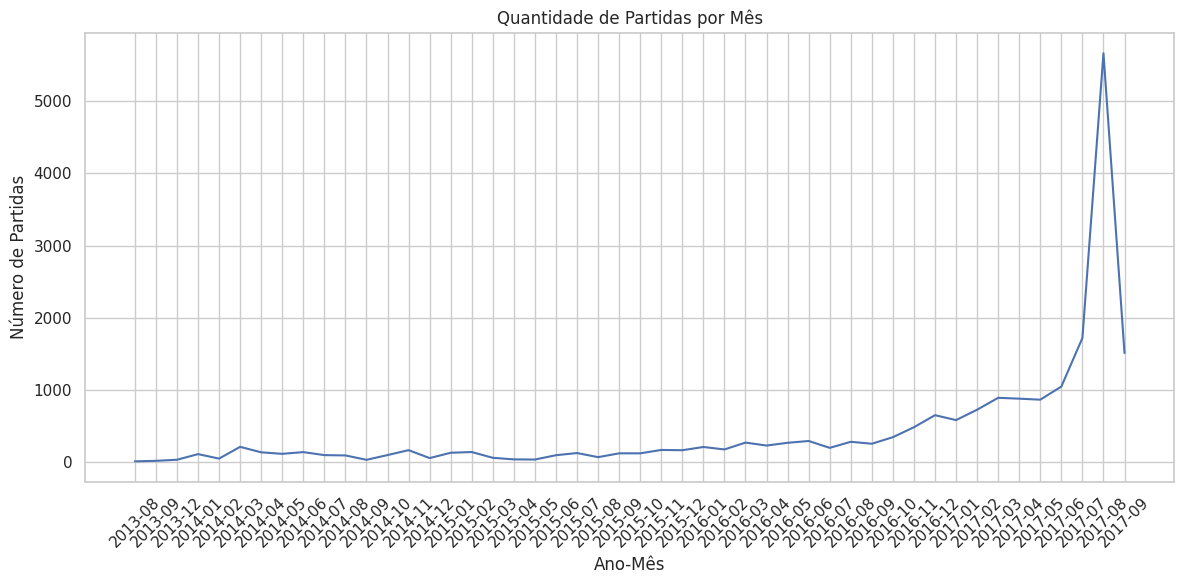

In [ ]:
# Converter 'created_at' para datetime
games_df['created_at'] = pd.to_datetime(games_df['created_at'], unit='ms', errors='coerce')

# Criar coluna com ano e mês
games_df['year_month'] = games_df['created_at'].dt.to_period('M')

# Contar partidas por mês
monthly_counts = games_df['year_month'].value_counts().sort_index()

# Gráfico de linhas
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values)
plt.xticks(rotation=45)
plt.title('Quantidade de Partidas por Mês')
plt.xlabel('Ano-Mês')
plt.ylabel('Número de Partidas')
plt.tight_layout()
plt.grid(True)
plt.show()


<ipython-input-8-328cff8ea43e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_counts.index, y=win_counts.values, palette='pastel')


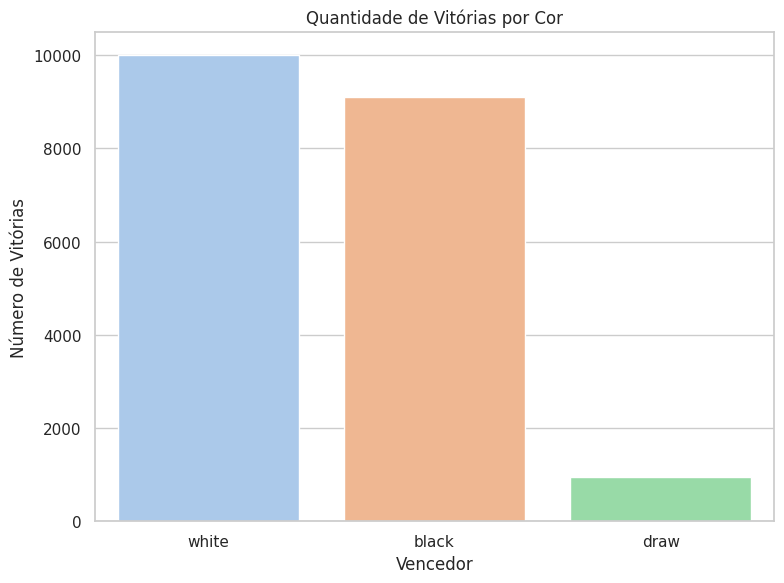

In [ ]:
# Contar vitórias por cor
win_counts = games_df['winner'].value_counts() # Changed 'df' to 'games_df'

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=win_counts.index, y=win_counts.values, palette='pastel')
plt.title('Quantidade de Vitórias por Cor')
plt.xlabel('Vencedor')
plt.ylabel('Número de Vitórias')
plt.tight_layout()
plt.show()

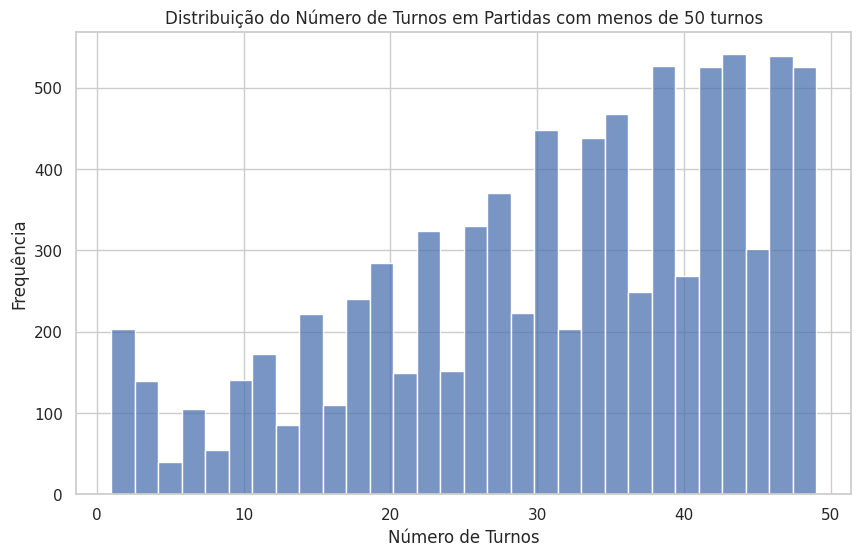

In [ ]:
# Criar histograma simples da coluna "turns"
# Filtrar partidas com menos de 50 turnos
short_games = games_df[games_df["turns"] < 50]

# Criar o histograma
plt.figure(figsize=(10,6))
sns.histplot(short_games["turns"], bins=30, kde=False)
plt.title("Distribuição do Número de Turnos em Partidas com menos de 50 turnos")
plt.xlabel("Número de Turnos")
plt.ylabel("Frequência")
plt.show()

<ipython-input-10-b633871b47d9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtro_df, x="victory_status", y="turns", palette="pastel")


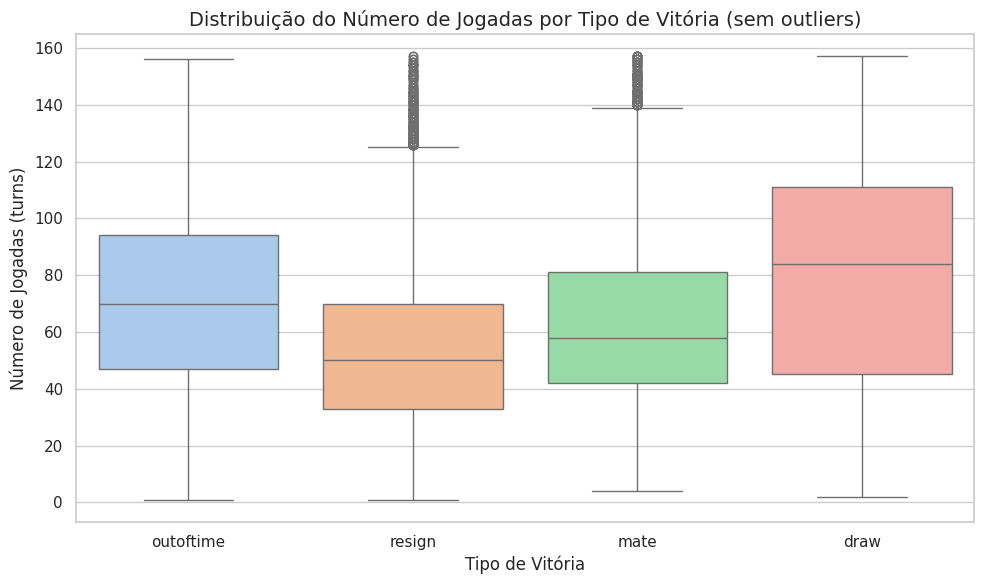

In [ ]:
# Filtrar outliers extremos (acima do percentil 99)
limite_turns = games_df["turns"].quantile(0.99)
filtro_df = games_df[games_df["turns"] <= limite_turns]

# Gráfico boxplot com análise por tipo de vitória
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtro_df, x="victory_status", y="turns", palette="pastel")

plt.title("Distribuição do Número de Jogadas por Tipo de Vitória (sem outliers)", fontsize=14)
plt.xlabel("Tipo de Vitória")
plt.ylabel("Número de Jogadas (turns)")

plt.tight_layout()
plt.show()

<ipython-input-11-1f3f214277a3>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(games_df["white_rating"], label="White Rating", shade=True, color="blue")
<ipython-input-11-1f3f214277a3>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(games_df["black_rating"], label="Black Rating", shade=True, color="darkred")


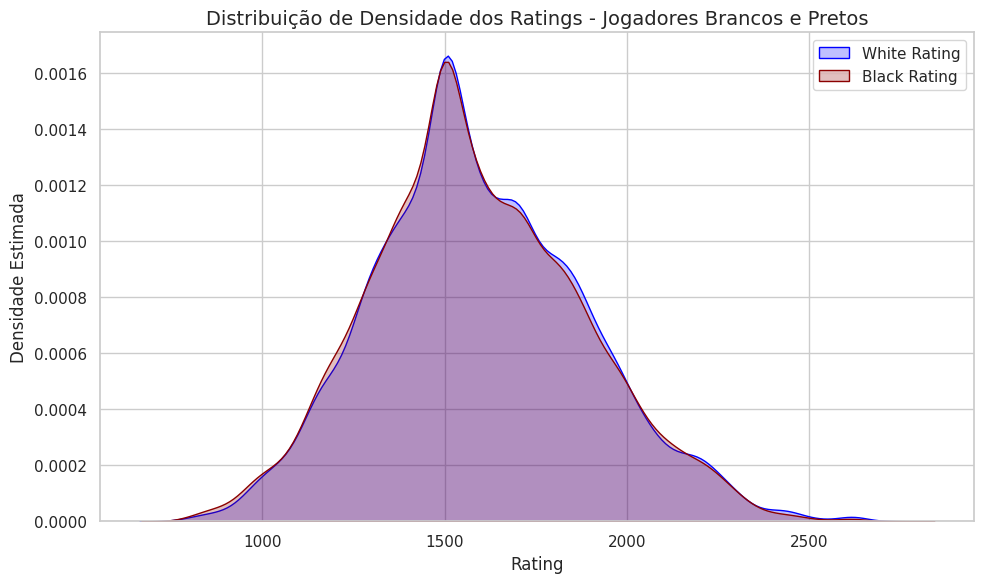

In [ ]:
# Configurar estilo
sns.set(style="whitegrid")

# Criar o gráfico de densidade dos ratings
plt.figure(figsize=(10, 6))
sns.kdeplot(games_df["white_rating"], label="White Rating", shade=True, color="blue")
sns.kdeplot(games_df["black_rating"], label="Black Rating", shade=True, color="darkred")

# Título e rótulos
plt.title("Distribuição de Densidade dos Ratings - Jogadores Brancos e Pretos", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Densidade Estimada")
plt.legend()

plt.tight_layout()
plt.show()

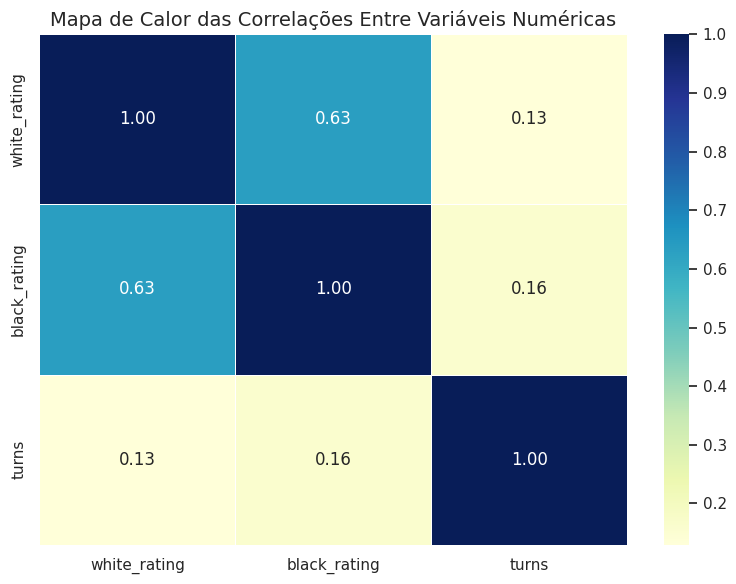

In [ ]:
# Selecionar apenas colunas numéricas relevantes
numeric_cols = games_df[["white_rating", "black_rating", "turns"]]

# Calcular a matriz de correlação
correlation_matrix = numeric_cols.corr()

# Plotar o heatmap com anotações
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)

# Título
plt.title("Mapa de Calor das Correlações Entre Variáveis Numéricas", fontsize=14)

plt.tight_layout()
plt.show()

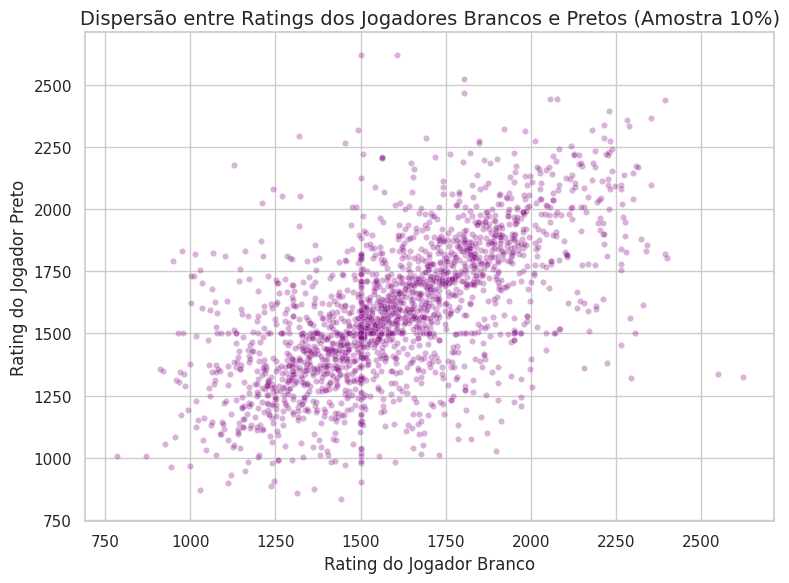

In [ ]:
# Criar o gráfico de dispersão
# Pegar uma amostra de 10% dos dados para plotar
sample_df = games_df.sample(frac=0.1, random_state=42)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=sample_df, x="white_rating", y="black_rating", alpha=0.3, color="purple", s=20)

plt.title("Dispersão entre Ratings dos Jogadores Brancos e Pretos (Amostra 10%)", fontsize=14)
plt.xlabel("Rating do Jogador Branco")
plt.ylabel("Rating do Jogador Preto")

plt.tight_layout()
plt.show()

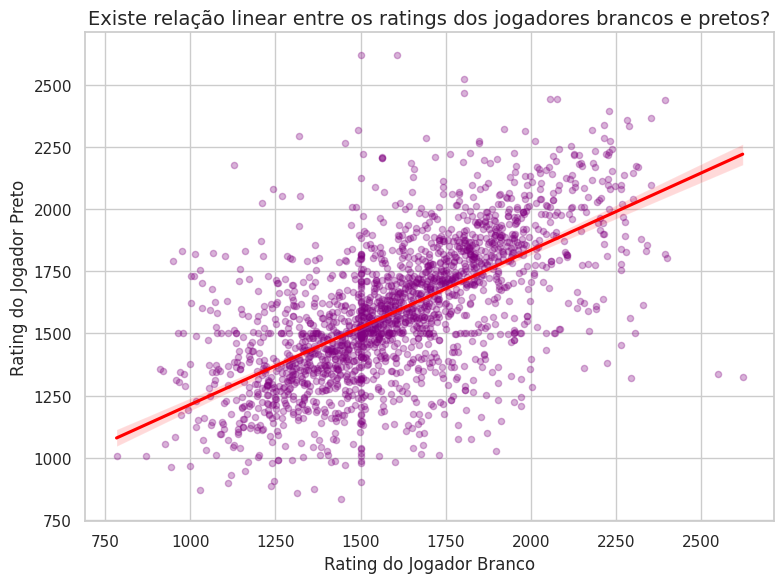

In [ ]:
# Amostragem de 10% dos dados
sample_df = games_df.sample(frac=0.1, random_state=42)

# Gráfico de dispersão com linha de regressão
plt.figure(figsize=(8, 6))
sns.regplot(data=sample_df, x="white_rating", y="black_rating",
            scatter_kws={"alpha": 0.3, "color": "purple", "s": 20},
            line_kws={"color": "red"})

plt.title("Existe relação linear entre os ratings dos jogadores brancos e pretos?", fontsize=14)
plt.xlabel("Rating do Jogador Branco")
plt.ylabel("Rating do Jogador Preto")
plt.tight_layout()
plt.show()

<ipython-input-18-08d75f759408>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtro_df, x="victory_status", y="turns", palette="pastel")


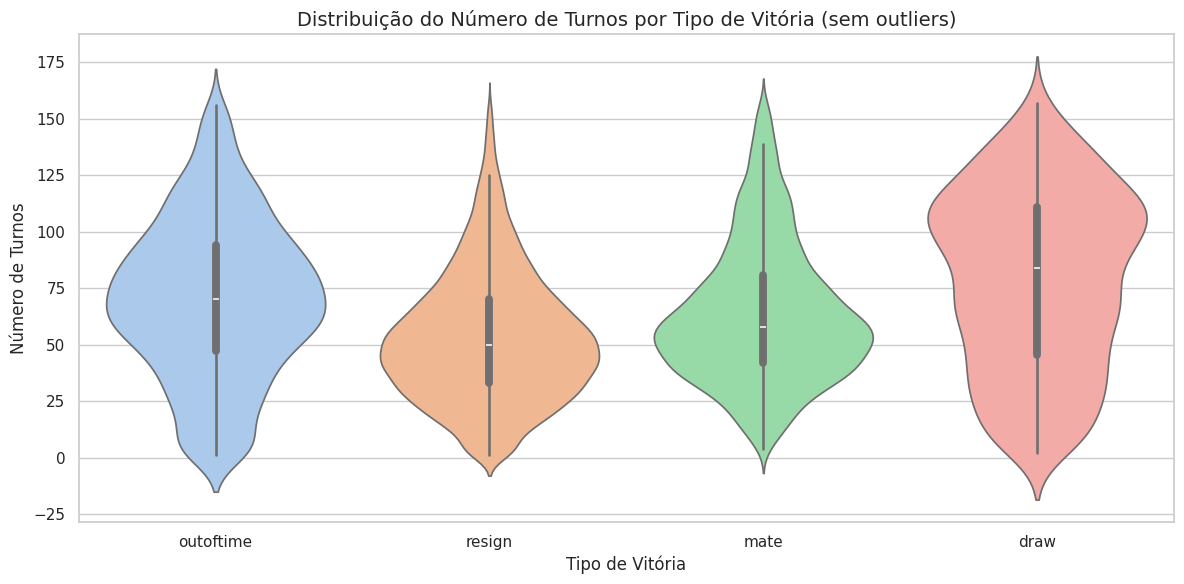

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtro_df, x="victory_status", y="turns", palette="pastel")
plt.title("Distribuição do Número de Turnos por Tipo de Vitória (sem outliers)", fontsize=14)
plt.xlabel("Tipo de Vitória")
plt.ylabel("Número de Turnos")
plt.tight_layout()
plt.show()


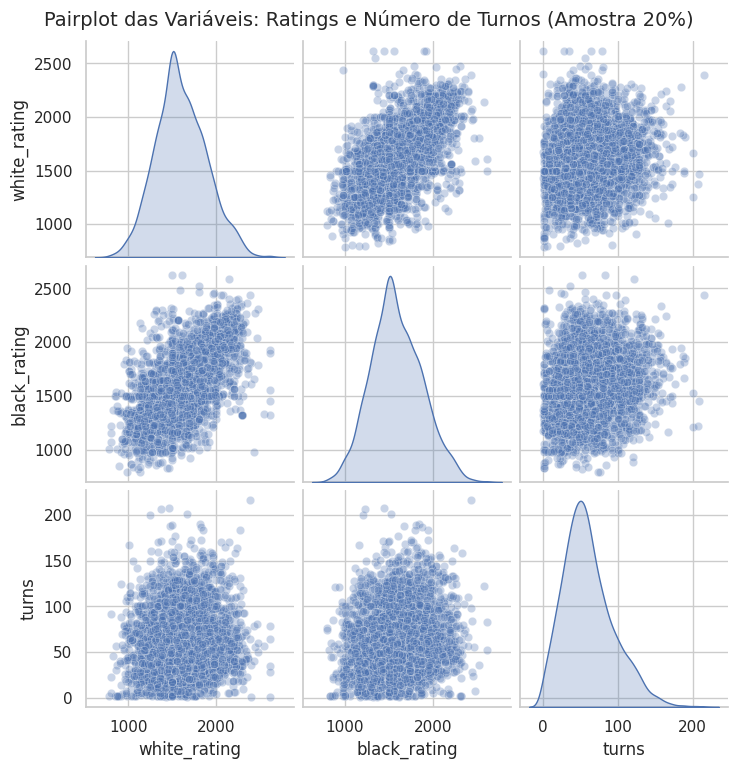

In [ ]:
# Amostra de 20% para reduzir pontos
sample_df = games_df[["white_rating", "black_rating", "turns"]].sample(frac=0.2, random_state=42)

# Pairplot com amostra reduzida
sns.pairplot(sample_df, diag_kind="kde", plot_kws={"alpha":0.3}, height=2.5)

plt.suptitle("Pairplot das Variáveis: Ratings e Número de Turnos (Amostra 20%)", y=1.02, fontsize=14)

plt.show()


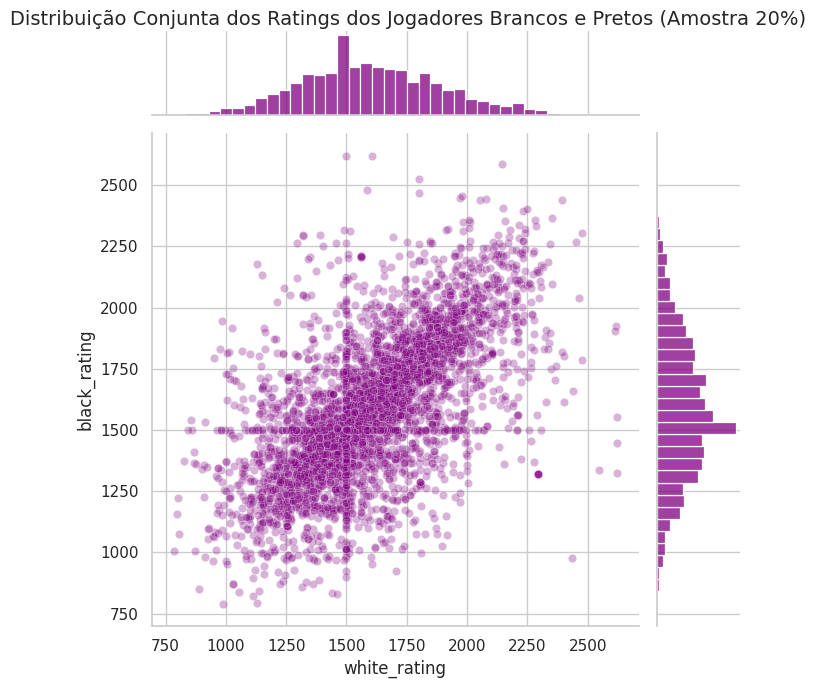

In [ ]:
# Pergunta:
# "Como os ratings dos jogadores brancos e pretos se distribuem em conjunto?
# Visualizamos a dispersão e a concentração dos ratings para identificar padrões
# de equilíbrio ou desigualdade entre os jogadores de cada lado."

# Amostra para reduzir pontos
sample_df = games_df.sample(frac=0.2, random_state=42)

# Jointplot com amostra e ajuste de tamanho
g = sns.jointplot(data=sample_df, x="white_rating", y="black_rating", kind="scatter",
                  alpha=0.3, color="purple", height=7)

# Ajustar título corretamente
g.fig.suptitle("Distribuição Conjunta dos Ratings dos Jogadores Brancos e Pretos (Amostra 20%)", fontsize=14)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)  # Ajustar para o título não sobrepor o gráfico

plt.show()
